# Projet spécialité Data-IA

# Analyse de données : l'industrie automobile et les changements climatiques

Scrapper les données mondiales des ventes/émissions de CO2 des véhicules terrestre motorisés dans le monde, puis par continent, puis par pays de l'Europe, et pour une personne

# Scrapping des données mondiales

In [1]:
import requests # requêter sur le site
from bs4 import BeautifulSoup # parcourir le HTML
import pandas as pd # formatter les données/exporter en CSV

## Les ventes de véhicules, par années/pays/continent de 1999 à 2022

Nous avons trouvé le site de OICA. Une rubrique répertorie la production de véhicules motorisés dans le monde depuis 1999.

L'idée est donc de scraper ces données, dans la catégorie <b>production-statistics/{ANNÉE}-statistics</b>

Nous travaillerons depuis 2000.

Problématique : le site sur lequel nous sommes tombés permet de récupérer les données en scrappant, ou en téléchargeant le format CSV. Les CSV permettent de connaitre les continents.
Mais la mise en page change souvent.

Pour les continents, un module Python existe, AWOC

# AWOC (test)

In [2]:
# # Import the AWOC package.
# import awoc

# # Initialize the AWOC class.
# my_world = awoc.AWOC()

# # Let's retrieve the full list of nations of Europe.
# countries_of_europe = my_world.get_countries_list_of('Europe')
# print(countries_of_europe)
# # It returns: [ 'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', and so on... ]

# # We can get the whole country data as well.
# italy_data = my_world.get_country_data('Italy')

# print(my_world.get_continents())

# PYCountry_Convert

Test avec ce module

In [3]:
import pycountry_convert as pc

def get_continent(country_alpha2):
    try:
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except ValueError:
        return None

# Exemple d'utilisation
country_alpha2 = "US"  # Code ISO 3166-1 alpha-2 des États-Unis
continent = get_continent(country_alpha2)

if continent:
    print(f"Le continent de {country_alpha2} est {continent}.")
else:
    print(f"Impossible de déterminer le continent pour {country_alpha2}.")


Le continent de US est North America.


In [4]:
import datetime

def get_current_year() -> int: 
    """ 
    for automatisation of the dataset. In 2025, 
    the program will research for the 2025's web page
    """
    today = datetime.date.today()
    year = today.year
    print(year)

    return year

def convert_to_csv(world_production_list: list):
    """
    convert the world production list to a csv file
    """
    df = pd.DataFrame(world_production_list)
    print(df.head(10))
    # df.insert(0, 'ID', range(1, len(quote_list) +1))
    df.to_csv(f'word_car_production_{begin_year}_{end_year}.csv', index=False, sep=';')

def scrape_page(soup: BeautifulSoup, world_production_list: list, start, end):
    """
    scrap page of the website
    """
    table = soup.find("tbody")
    countries = table.find_all("tr")

    # print(countries)

    for country_tr in countries:
        country_name = country_tr.find("td", {"class": f"column-1"}).text
        nbr_cars = country_tr.find("td", {"class": f"column-2"}).text
        nbr_commercial_vehicle = country_tr.find("td", {"class": f"column-3"}).text
        total = country_tr.find("td", {"class": f"column-4"}).text
        percent_change = country_tr.find("td", {"class": f"column-5"}).text

        # print(country_tr)
        # print(country_name)

        dict = {
            'Year': '',
            'Country_Name': '',
            'Nbr_Cars': '',
            'Nbr_Commercial_Vehicle': '',
            'Total': '',
            'Percent_Change': ''
        }

        dict['Year'] = start
        dict["Country_Name"] = country_name
        dict["Nbr_Cars"] = nbr_cars
        dict["Nbr_Commercial_Vehicle"] = nbr_commercial_vehicle
        dict["Total"] = total
        dict["Percent_Change"] = percent_change

        world_production_list.append(dict)

    start += 1

    if start <= end_year:
        print('Accès à la page suivante')
        next_url = f'{target}{start}-statistics'
        print(f"Next URL : {next_url}")
        req = requests.get(target +  next_url)
        next_soup = BeautifulSoup(req.text, "html.parser")
        scrape_page(next_soup, world_production_list, start, end)

    return 

# begin_year = 2015
begin_year = 2000
end_year = get_current_year() - 1

target = f'https://www.oica.net/category/production-statistics/'
# https://www.oica.net/category/production-statistics/2015-statistics/
req = requests.get(target + f'{begin_year}-statistics')

if req.status_code != 200:
    print("Erreur")
    exit(0)
else:
    print(f"Accès au site {target}, status = {req.status_code}")

soup = BeautifulSoup(req.text, "html.parser")

if __name__ == "__main__":
    print(f"Date de début {begin_year}; Date de fin : {end_year}")

    world_production_list = []
    # print(world_production_list)
    scrape_page(soup, world_production_list, begin_year, end_year)
    print(world_production_list)
    convert_to_csv(world_production_list)


2024
Accès au site https://www.oica.net/category/production-statistics/, status = 200
Date de début 2000; Date de fin : 2023
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2001-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2002-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2003-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2004-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2005-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2006-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2007-statistics
Accès à la page suivante
Next URL : https://www.oica.net/category/production-statistics/2008-statistics
Accès à la page suivante
Next URL : https:/

# Amélioration du dataset

Afin d'afficher les données via une carte du monde, nous avons le nom des pays, mais aimerions également avoir les continents.

## Rajout des continents

Afin de réaliser notre storytelling, nous souhaitons faire une étude par pays, mais également pas continent et dans le monde. Il faut alors ajouter une colonne continent pour nos données

In [5]:
import pandas as pd
import pycountry_convert as pc

In [6]:
df = pd.read_csv(f"./word_car_production_{begin_year}_{end_year}.csv", delimiter=";")

df.head()

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change
0,2000,Argentina,"238,921","100,711","339,632",11.4%
1,2000,Australia,"323,649","23,473","347,122",14.6%
2,2000,Austria,"115,979","25,047","141,026",1.2%
3,2000,Belgium,"912,233","121,061","1,033,294",1.6%
4,2000,Brazil,"1,351,998","329,519","1,681,517",24.5%


In [7]:
df.describe()

,Year
count,957.000000
mean,2011.457680
std,6.901999
min,2000.000000
25%,2005.000000
50%,2011.000000
75%,2017.000000
max,2023.000000


In [8]:
df.columns

Index(['Year', 'Country_Name', 'Nbr_Cars', 'Nbr_Commercial_Vehicle', 'Total',
       'Percent_Change'],
      dtype='object')

### Corriger les erreurs de noms de pays

Certains pays posent problème car il ne sont pas formatés correctement pour pycountry_convert. Nous remplaçons alors leur nom par un format adéquat.

In [9]:
# Correct format for Czech Republic
# df['Country_Name'] = df['Country_Name'].replace('Czech Rep.', 'Czech Republic')
df['Country_Name'] = df['Country_Name'].replace('Czech Rep.', 'Czechia')

# Format correct for United Kingdom
df['Country_Name'] = df['Country_Name'].replace('UK', 'United Kingdom')

In [10]:
df.head(10)

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change
0,2000,Argentina,"238,921","100,711","339,632",11.4%
1,2000,Australia,"323,649","23,473","347,122",14.6%
2,2000,Austria,"115,979","25,047","141,026",1.2%
3,2000,Belgium,"912,233","121,061","1,033,294",1.6%
4,2000,Brazil,"1,351,998","329,519","1,681,517",24.5%
5,2000,Canada,"1,550,500","1,411,136","2,961,636",-3.2%
6,2000,China,"604,677","1,464,392","2,069,069",13.1%
7,2000,Czechia,"428,224","27,268","455,492",21.1%
8,2000,Egypt,"39,616","20,149","59,765",-21.4%
9,2000,Finland,"38,468",458,"38,926",13.2%


In [11]:
select_country = df.loc[df['Year'] == 2023]
print(select_country)

     Year    Country_Name    Nbr_Cars Nbr_Commercial_Vehicle       Total  \
918  2023       ARGENTINA     304 783                305 942     610 725   
919  2023         AUSTRIA     102 291                 11 900     114 191   
920  2023         BELGIUM     285 159                 46 944     332 103   
921  2023          BRAZIL   1 781 612                543 226   2 324 838   
922  2023          CANADA     376 888              1 176 138   1 553 026   
923  2023           CHINA  26 123 757              4 037 209  30 160 966   
924  2023  CZECH REPUBLIC   1 397 816                  6 685   1 404 501   
925  2023         FINLAND      30 191                    NaN      30 191   
926  2023          FRANCE   1 026 690                478 386   1 505 076   
927  2023         GERMANY   4 109 371                    NaN   4 109 371   
928  2023         HUNGARY     507 225                    NaN     507 225   
929  2023           INDIA   4 783 628              1 067 879   5 851 507   
930  2023   

In [12]:
def get_continent_name(row):
    """
    get the continent code for a dataframe's row
    """
    print(row)
    try:
        if type(row.Country_Name) == float:
            return
        
        if row.Country_Name.lower() == 'total':
            return 'Entire World'
        
        if row.Country_Name.lower() == 'supplementary':
            row.Country_Name = 'Others'
        
        if row.Country_Name.lower() == 'others':
            return 'Other'
            
        country_alpha2 = pc.country_name_to_country_alpha2(row.Country_Name.title() if row.Country_Name != 'USA' else row.Country_Name, cn_name_format="default")
        # print(row.Country_Name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        
        return continent_name
    
    except (ValueError, KeyError, TypeError) as e:
        print(f"Erreur lors de la conversion pour {row.Country_Name}: {e}")
        print(row)
        return None

In [13]:
df['Continent'] = df.apply(get_continent_name, axis=1)

Year                           2000
Country_Name              Argentina
Nbr_Cars                    238,921
Nbr_Commercial_Vehicle      100,711
Total                       339,632
Percent_Change                11.4%
Name: 0, dtype: object
Year                           2000
Country_Name              Australia
Nbr_Cars                    323,649
Nbr_Commercial_Vehicle       23,473
Total                       347,122
Percent_Change                14.6%
Name: 1, dtype: object
Year                         2000
Country_Name              Austria
Nbr_Cars                  115,979
Nbr_Commercial_Vehicle     25,047
Total                     141,026
Percent_Change               1.2%
Name: 2, dtype: object
Year                           2000
Country_Name                Belgium
Nbr_Cars                    912,233
Nbr_Commercial_Vehicle      121,061
Total                     1,033,294
Percent_Change                 1.6%
Name: 3, dtype: object
Year                           2000
Country_Name        

c:\Users\Luc\Projets\Ynov\analyse_auto\env\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
c:\Users\Luc\Projets\Ynov\analyse_auto\env\Lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


Year                            2005
Country_Name                   Japan
Nbr_Cars                   9,016,735
Nbr_Commercial_Vehicle     1,782,924
Total                     10,799,659
Percent_Change                  2.7%
Name: 217, dtype: object
Year                          2005
Country_Name              Malaysia
Nbr_Cars                   404,571
Nbr_Commercial_Vehicle     158,837
Total                      563,408
Percent_Change               19.4%
Name: 218, dtype: object
Year                           2005
Country_Name                 Mexico
Nbr_Cars                    846,048
Nbr_Commercial_Vehicle      838,190
Total                     1,684,238
Percent_Change                 6.8%
Name: 219, dtype: object
Year                             2005
Country_Name              Netherlands
Nbr_Cars                      115,121
Nbr_Commercial_Vehicle         65,627
Total                         180,748
Percent_Change                 -27.0%
Name: 220, dtype: object
Year                    

In [14]:
df.head(41)

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change,Continent
0,2000,Argentina,"238,921","100,711","339,632",11.4%,South America
1,2000,Australia,"323,649","23,473","347,122",14.6%,Oceania
2,2000,Austria,"115,979","25,047","141,026",1.2%,Europe
3,2000,Belgium,"912,233","121,061","1,033,294",1.6%,Europe
4,2000,Brazil,"1,351,998","329,519","1,681,517",24.5%,South America
5,2000,Canada,"1,550,500","1,411,136","2,961,636",-3.2%,North America
6,2000,China,"604,677","1,464,392","2,069,069",13.1%,Asia
7,2000,Czechia,"428,224","27,268","455,492",21.1%,Europe
8,2000,Egypt,"39,616","20,149","59,765",-21.4%,Africa
9,2000,Finland,"38,468",458,"38,926",13.2%,Europe


In [15]:
select_country = df.loc[df['Country_Name'] == 'France']
print(select_country)

     Year Country_Name   Nbr_Cars Nbr_Commercial_Vehicle      Total  \
10   2000       France  2,879,810                468,551  3,348,361   
50   2001       France  3,181,549                446,869  3,628,418   
90   2002       France  3,292,797                309,073  3,601,870   
130  2003       France  3,220,329                399,737  3,620,066   
170  2004       France  3,227,416                438,574  3,665,990   
210  2005       France  3,112,961                436,047  3,549,008   
250  2006       France  2,723,196                446,023  3,169,219   
290  2007       France  2,550,869                464,985  3,015,854   
330  2008       France  2,145,935                423,043  2,568,978   
370  2009       France  1,819,497                228,196  2,047,693   
410  2010       France  1,924,171                305,250  2,229,421   
450  2011       France  1,931,030                311,898  2,242,928   
490  2012       France  1,682,814                284,951  1,967,765   
530  2

In [16]:
df.dtypes

Year                       int64
Country_Name              object
Nbr_Cars                  object
Nbr_Commercial_Vehicle    object
Total                     object
Percent_Change            object
Continent                 object
dtype: object

Convertir la colonne <b>Year</b> en datetime

In [17]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [18]:
df.dtypes

Year                      datetime64[ns]
Country_Name                      object
Nbr_Cars                          object
Nbr_Commercial_Vehicle            object
Total                             object
Percent_Change                    object
Continent                         object
dtype: object

In [19]:
df = df.dropna(subset=['Country_Name'])
df.head()

,Year,Country_Name,Nbr_Cars,Nbr_Commercial_Vehicle,Total,Percent_Change,Continent
0,2000-01-01,Argentina,"238,921","100,711","339,632",11.4%,South America
1,2000-01-01,Australia,"323,649","23,473","347,122",14.6%,Oceania
2,2000-01-01,Austria,"115,979","25,047","141,026",1.2%,Europe
3,2000-01-01,Belgium,"912,233","121,061","1,033,294",1.6%,Europe
4,2000-01-01,Brazil,"1,351,998","329,519","1,681,517",24.5%,South America


In [20]:
years = df['Year'].unique()

for i in range(len(years)):
    select_top_country_by_year = df.groupby(df['Year'].dt.year)['Total'].max().reset_index()

print(select_top_country_by_year)

    Year       Total
0   2000     801,360
1   2001   9,777,191
2   2002     894,796
3   2003      95,247
4   2004     927,981
5   2005      95,814
6   2006     987,780
7   2007     997,240
8   2008     952,840
9   2009     999,378
10  2010      94,132
11  2011     838,388
12  2012     926,555
13  2013     975,000
14  2014     971,160
15  2015     982,337
16  2016     920,162
17  2017       99880
18  2018     9728528
19  2019     9684298
20  2020      987044
21  2021       95797
22  2022      876614
23  2023  93 546 599


## Enlever les virgules des entiers

Nous décidons d'enlever les virgules pour le moment, pour pouvoir mettre ces valeurs en tant qu'entiers sur les applications que nous utiliserons ou non, comme PowerBI, qui n'accepte pas les entiers qui sont de la forme 2,555,555. Nous allons les mettre de la forme 2555555 et tester également de la forme 2.555.555.

In [21]:
dot_to_delete_cols = ['Nbr_Cars', 'Nbr_Commercial_Vehicle',	'Total']

for col in dot_to_delete_cols:
    df[col] = df[col].replace(',', '', regex=True)
    df[col] = df[col].replace(' ', '', regex=True)

In [22]:
df['Country_Name'] = df['Country_Name'].str.capitalize()

### Enlever les lignes "total"

Enlever les lignes totales pour qu'elles ne soient pas prises en comptes lors des visuels (exmeple: USA = 5000; France = 4000; Total = 9000).

Lors des visuels, la valeur va prende 18000, car elle va aussi compter le total.

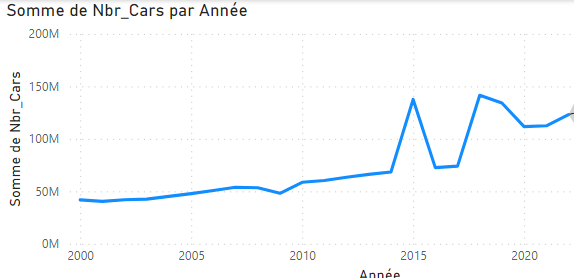

A partir de 2015, des lignes permettant de voir le Total apparaissent, et faussent donc les données.

### Remplacer les valeurs nulles, ou autre que des chiffres par 0

In [23]:
columns = ['Nbr_Cars', 'Nbr_Commercial_Vehicle', 'Total', 'Percent_Change']

In [24]:
for col in columns:
    df[col] = df[col].replace({'-': 0, 'N.A.': 0}).fillna(0)

### Rajouter des '%' pour chaque valeur de la colonne de pourcentage d'évolution

In [25]:
def add_percent(value):
    if isinstance(value, str) and not value.endswith('%'):
        return value + '%'
    elif isinstance(value, (int, float)):
        return str(value) + '%'
    else:
        return value

df['Percent_Change'] = df['Percent_Change'].apply(add_percent)


# Exporter le dataframe en CSV

In [26]:
filename_to_save = f'world_car_production_{begin_year}-{end_year}_clean.csv'
df.to_csv(filename_to_save, index=False, sep=';')

PBI : Fichier > Options et paramètres > Options > Fonctionnalités en préversion > Intéractions sur l'objet => ACTIVER 